# Amazon Fine Food Reviews

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from pylab import figure, axes, pie, title, show
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#data = pd.read_csv('AFFReviews.csv', delimiter=",", header=0)
data = pd.read_csv('Reviews.csv', encoding='utf-8')
print data.info()
print data.head()
#data.to_csv('Reviews_clean.csv', index=False, encoding='utf-8')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568453 entries, 0 to 568452
Data columns (total 2 columns):
Score    568453 non-null int64
Text     568453 non-null object
dtypes: int64(1), object(1)
memory usage: 8.7+ MB
None
   Score                                               Text
0      5  I have bought several of the Vitality canned d...
1      1  Product arrived labeled as Jumbo Salted Peanut...
2      4  This is a confection that has been around a fe...
3      2  If you are looking for the secret ingredient i...
4      5  Great taffy at a great price.  There was a wid...


In [3]:
pd.__version__

u'0.20.1'

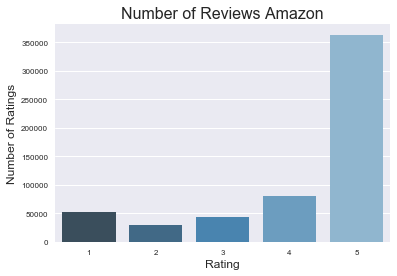

In [4]:
#Graph - Score
ax = sns.countplot(data['Score'], palette='Blues_d')
ax.set_xlabel('Rating', fontsize = 12)
ax.set_ylabel('Number of Ratings', fontsize = 12)
ax.set_title('Number of Reviews Amazon', fontsize=16)
ax.tick_params(labelsize = 8)
pylab.rcParams['figure.figsize'] = (4, 8)
plt.show()
fig = ax.get_figure()
#fig.savefig("AFF.png")

In [5]:
data['Score'].value_counts()
#to sample it evenly, we'd need around 80k reviews from each

5    363121
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

In [6]:
#remove rows which contain ratings of 3 (Neutral and not included in our analysis.)
data = data[data.Score != 3]
print(data.head())
data['Score'].value_counts() 

   Score                                               Text
0      5  I have bought several of the Vitality canned d...
1      1  Product arrived labeled as Jumbo Salted Peanut...
2      4  This is a confection that has been around a fe...
3      2  If you are looking for the secret ingredient i...
4      5  Great taffy at a great price.  There was a wid...


5    363121
4     80655
1     52268
2     29769
Name: Score, dtype: int64

In [7]:
#create 2 datasets and merge them. 
negative_sample = data.loc[data.Score <=2]
positive_sample = data.loc[data.Score >=4]

In [8]:
print len(negative_sample)
print len(positive_sample)

82037
443776


Create Positive Examples Dataset

In [9]:
#Create a sample dataset so we can evenly match the amount of pos/neg examples/  
size = 82000 
subdata = positive_sample.sample(n = size, random_state=520)

#subdata = subdata[pd.notnull(subdata['text'])] - to get rid of null values

print subdata.index
subdata.to_csv('AFFpos80k.csv', index=False, sep=',', encoding='utf-8')

Int64Index([517498,  69991, 246163, 499720, 214137, 105762,  90411, 315855,
             37494, 365286,
            ...
            137497, 216038, 421225,  18520, 404772, 490130,  13227, 370533,
            511773, 266209],
           dtype='int64', length=82000)


In [10]:
#Load in the sample data
pos_data = pd.read_csv('AFFpos80k.csv', index_col=False)
print pos_data.iloc[:5]

   Score                                               Text
0      4  I like this brand. I didn't realize I was orde...
1      5  Being my wife is a licensed cosmetologist and ...
2      5  If you are looking for an upgrade from the sta...
3      5  I am so allergic to too many artificial sweete...
4      5  I have not been able to find this locally and ...


Create Negative Examples Dataset

In [11]:
#Create a sample dataset so we can evenly match the amount of pos/neg examples/  
size = 82000 
subdata = negative_sample.sample(n = size, random_state=520)

#subdata = subdata[pd.notnull(subdata['text'])] - to get rid of null values

print subdata.index
subdata.to_csv('AFFneg80k.csv', index=False, sep=',', encoding='utf-8')

Int64Index([162858, 203095,  76013, 338750, 376569, 178722, 358605,  36238,
            144130,  35358,
            ...
            356709, 203989,  51200,  91697, 472635, 249620, 333188, 486836,
            510249, 254128],
           dtype='int64', length=82000)


In [12]:
#Load in the sample data
neg_data = pd.read_csv('AFFneg80k.csv', index_col=False)
print neg_data.iloc[:5]

   Score                                               Text
0      2  This product did not work for me. I live in Ne...
1      1  I have been trying to find a good brand of jer...
2      1  These used to be so good and I used to buy the...
3      1  Let me preface this review with a qualificatio...
4      1  The item description and content sounded great...


Merge the positive and negative datasets so that we have one highly balanced dataset

In [13]:
# stack the DataFrames on top of each other
merged = pd.concat([pos_data, neg_data], axis=0)

In [14]:
print merged.head()

   Score                                               Text
0      4  I like this brand. I didn't realize I was orde...
1      5  Being my wife is a licensed cosmetologist and ...
2      5  If you are looking for an upgrade from the sta...
3      5  I am so allergic to too many artificial sweete...
4      5  I have not been able to find this locally and ...


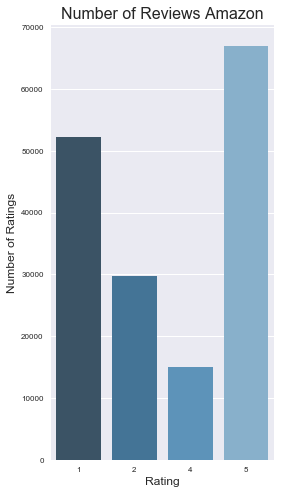

In [15]:
#Graph - Score
ax = sns.countplot(merged['Score'], palette='Blues_d')
ax.set_xlabel('Rating', fontsize = 12)
ax.set_ylabel('Number of Ratings', fontsize = 12)
ax.set_title('Number of Reviews Amazon', fontsize=16)
ax.tick_params(labelsize = 8)
pylab.rcParams['figure.figsize'] = (4, 8)
plt.show()
fig = ax.get_figure()
#fig.savefig("AFF.png")

In [16]:
merged.loc[merged.Score <=2, 'Score'] = 0
merged.loc[merged.Score >=4, 'Score'] = 1
        
merged['Score'].value_counts()

1    82000
0    82000
Name: Score, dtype: int64

In [17]:
#Now that we have a balanced dataset, we can save it to a CSV file so that it can be used in our
#analysis

merged.to_csv('AFF_Evenly_Sampled.csv', index=False, sep=',', encoding='utf-8')

In [23]:
#Load in the new data
data = pd.read_csv('AFF_Evenly_Sampled.csv', index_col=False, encoding='utf-8')
print data.iloc[:5]
data['Score'].value_counts()

   Score                                               Text
0      1  I like this brand. I didn't realize I was orde...
1      1  Being my wife is a licensed cosmetologist and ...
2      1  If you are looking for an upgrade from the sta...
3      1  I am so allergic to too many artificial sweete...
4      1  I have not been able to find this locally and ...


1    82000
0    82000
Name: Score, dtype: int64

In [24]:
from __future__ import division
from sklearn.cross_validation import train_test_split
from Word2VecUtility import Word2VecUtility
import pickle
import pandas as pd
import numpy as np
from gensim.models import word2vec
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

In [25]:
import nltk.data
#nltk.download()
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [26]:
review_sents = []
print "Cleaning and parsing the reviews...\n"
for i in xrange( 0, len(data["Text"])):
    # sent_reviews += Word2VecUtility.review_to_sentences(data["text"][i], tokenizer)
    review_sents += Word2VecUtility.review_to_sentences(data.iloc[i]["Text"], tokenizer)

Cleaning and parsing the reviews...



C:\Users\James\Anaconda3\envs\python2\lib\site-packages\bs4\__init__.py:282: UserWarning: "http://www.amazon.com/gp/product/B004HYXZB6/ref=cm_cr_rev_prod_title" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Users\James\Anaconda3\envs\python2\lib\site-packages\bs4\__init__.py:219: UserWarning: ".." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\Users\James\Anaconda3\envs\python2\lib\site-packages\bs4\__init__.py:219: UserWarning: "..." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\Users\James\Anaconda3\envs\python2\lib\site-packages\bs4\__init__.py:282: UserWarning: "http://www.amazon.com/G

In [27]:
# review_sents = pickle.load(open('review_sents_1859888.pkl', 'rb'))
print len(review_sents)
print review_sents[:10]

843499
[[u'i', u'like', u'this', u'brand'], [u'i', u'didn', u't', u'realize', u'i', u'was', u'ordering', u'extra', u'bold'], [u'to', u'me', u'these', u't', u'cups', u'are', u'bitter'], [u'since', u'i', u'can', u't', u'control', u'the', u'strength', u'i', u'make', u'a', u'small', u'cup', u'and', u'toss'], [u'then', u'i', u'make', u'a', u'large', u'cup', u'to', u'drink'], [u'it', u'is', u'still', u'strong', u'which', u'i', u'like', u'but', u'still', u'has', u'a', u'bit', u'of', u'bitter', u'aftertaste'], [u'i', u'still', u'like', u'this', u'brand'], [u'being', u'my', u'wife', u'is', u'a', u'licensed', u'cosmetologist', u'and', u'is', u'very', u'familiar', u'with', u'hair', u'products', u'in', u'general', u'and', u'being', u'she', u's', u'the', u'one', u'who', u'grooms', u'our', u'coton', u'de', u'tulear', u'she', u'was', u'quite', u'impressed', u'with', u'lambert', u'kay', u'fresh', u'n', u'clean', u'dog', u'creme', u'rinse', u'for', u'the', u'no', u'tangle', u'aspect', u'but', u'also', 

In [28]:
#count the number of words:
# review_words = []
# print "Cleaning and parsing the reviews...\n"
# for i in xrange( 0, len(data["Text"])):
#     # sent_reviews += Word2VecUtility.review_to_sentences(data["text"][i], tokenizer)
#     review_words += Word2VecUtility.review_to_wordlist(data.iloc[i]["Text"])

In [29]:
# # review_sents = pickle.load(open('review_sents_1859888.pkl', 'rb'))
# print len(review_words)
# print review_words[:5]

In [30]:
print(data[0:10])

   Score                                               Text
0      1  I like this brand. I didn't realize I was orde...
1      1  Being my wife is a licensed cosmetologist and ...
2      1  If you are looking for an upgrade from the sta...
3      1  I am so allergic to too many artificial sweete...
4      1  I have not been able to find this locally and ...
5      1  This coffee is delicious, low-calorie and easy...
6      1  I did not have the quality problems that other...
7      1  My four kitty cats are in love with this food....
8      1  These bars are great! Great tasting and with q...
9      1  Simply THE BEST.  NOT hard - GREAT FLAVOR ( th...
